In [179]:
# Import libraries
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler #for feature engineering 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error # for␣evaluating ml models

In [180]:
df = pd.read_csv("C:/Users/raees/Desktop/New folder/Projects/machine-learning/Projects/Regression/data/Real_Estate.csv")
df

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.01500,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.01440,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.67100,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.06700,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.40000,6,25.011037,121.479946,21.654710
...,...,...,...,...,...,...,...
409,2013-07-25 15:30:36.565239,18.3,170.12890,6,24.981186,121.486798,29.096310
410,2013-07-26 17:16:34.019780,11.9,323.69120,2,24.950070,121.483918,33.871347
411,2013-07-28 21:47:23.339050,0.0,451.64190,8,24.963901,121.543387,25.255105
412,2013-07-29 13:33:29.405317,35.9,292.99780,5,24.997863,121.558286,25.285620


In [181]:
#first 5 rows
df.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


In [182]:
#last 5 rows
df.tail()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
409,2013-07-25 15:30:36.565239,18.3,170.12890,6,24.981186,121.486798,29.096310
410,2013-07-26 17:16:34.019780,11.9,323.69120,2,24.950070,121.483918,33.871347
411,2013-07-28 21:47:23.339050,0.0,451.64190,8,24.963901,121.543387,25.255105
412,2013-07-29 13:33:29.405317,35.9,292.99780,5,24.997863,121.558286,25.285620
413,2013-08-01 09:49:41.506402,12.0,90.45606,6,24.952904,121.526395,37.580554


In [183]:
# checking the data types and null values
df.info()

# Converting date object column to string
df['Transaction date'] = df['Transaction date'].astype('string')

# drop transaction date column
df = df.drop('Transaction date', axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0 

In [184]:
# checking unique values
df.nunique()

House age                              178
Distance to the nearest MRT station    183
Number of convenience stores            11
Latitude                               414
Longitude                              414
House price of unit area               384
dtype: int64

In [185]:
# checking duplicate values
df.duplicated().value_counts()

False    414
Name: count, dtype: int64

In [186]:
# droping duplicate values
df.drop_duplicates(inplace=True)
# rows, columns
df.shape

# No duplicate rows in this data set

(414, 6)

In [187]:
#rows*columns
df.size

# Give a count for a value in the column
# normalize=True gives us a fraction (percentage, it adds up to 1)
print(df["House age"].value_counts(normalize=True))

df.describe()

House age
0.0     0.053140
1.1     0.019324
40.9    0.019324
13.3    0.016908
17.5    0.016908
          ...   
36.6    0.002415
26.4    0.002415
30.3    0.002415
15.5    0.002415
33.5    0.002415
Name: proportion, Length: 178, dtype: float64


,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,18.405072,1064.468233,4.265700,24.973605,121.520268,29.102149
std,11.757670,1196.749385,2.880498,0.024178,0.026989,15.750935
min,0.000000,23.382840,0.000000,24.932075,121.473888,0.000000
25%,9.900000,289.324800,2.000000,24.952422,121.496866,18.422493
50%,16.450000,506.114400,5.000000,24.974353,121.520912,30.394070
75%,30.375000,1454.279000,6.750000,24.994947,121.544676,40.615184
max,42.700000,6306.153000,10.000000,25.014578,121.565321,65.571716


In [188]:
# Sorting data
df.sort_values(by=["Distance to the nearest MRT station", "House price of unit area"], ascending=[True, False]).head()4

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
148,16.9,23.38284,1,24.969730,121.549660,47.254929
12,27.5,49.66105,9,24.969794,121.544777,58.163304
188,36.6,49.66105,3,24.985478,121.529325,38.988270
316,13.1,56.47425,8,24.982713,121.497470,33.900758
321,17.3,56.47425,5,24.996894,121.561809,22.795135


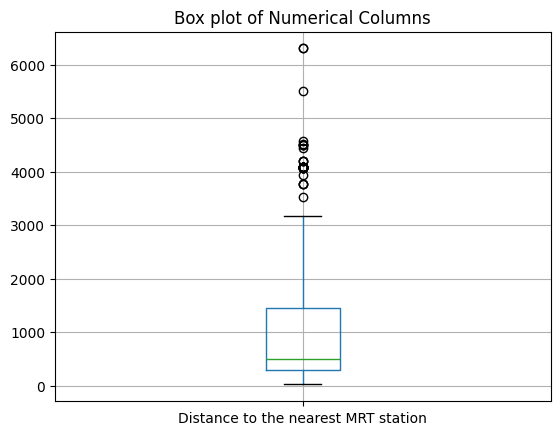

In [189]:
# Visualize box plots for numerical columns 
df.boxplot(column=['Distance to the nearest MRT station']) 
plt.title('Box plot of Numerical Columns')
plt.show()

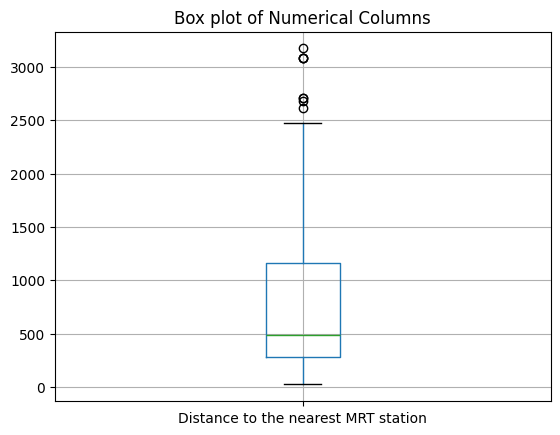

In [190]:
# Handling outliers
# Remove outliers based on a specific threshold
df = df[(df['Distance to the nearest MRT station'] < 3200)]

# Visualize box plots for numerical columns 
df.boxplot(column=['Distance to the nearest MRT station']) 
plt.title('Box plot of Numerical Columns')
plt.show()

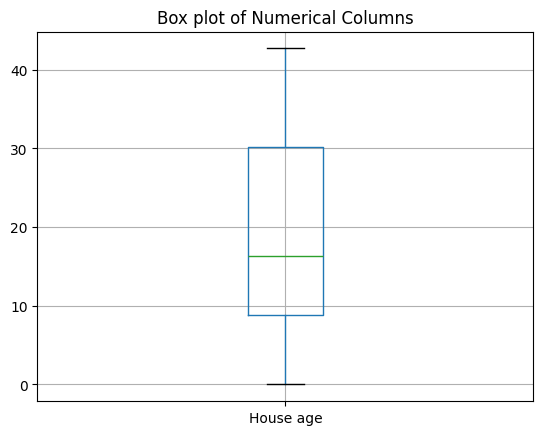

In [191]:
# Visualize box plots for numerical columns 
df.boxplot(column=['House age']) 
plt.title('Box plot of Numerical Columns')
plt.show()

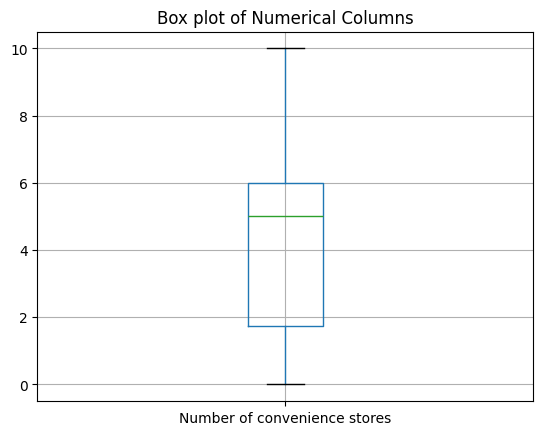

In [192]:
# Visualize box plots for numerical columns 
df.boxplot(column=['Number of convenience stores']) 
plt.title('Box plot of Numerical Columns')
plt.show()

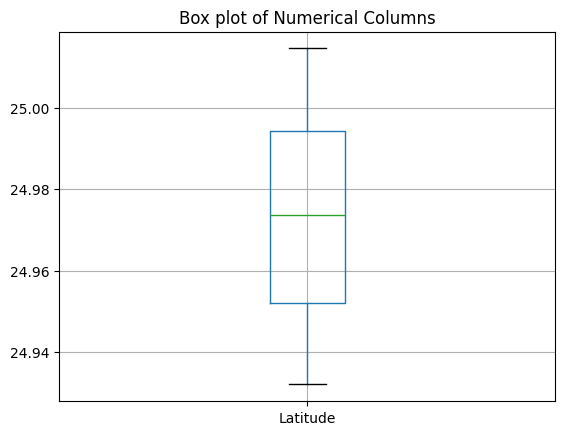

In [193]:
# Visualize box plots for numerical columns 
df.boxplot(column=['Latitude']) 
plt.title('Box plot of Numerical Columns')
plt.show()

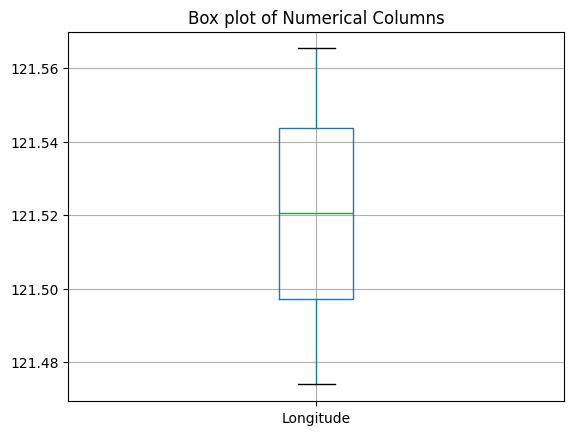

In [194]:
# Visualize box plots for numerical columns 
df.boxplot(column=['Longitude']) 
plt.title('Box plot of Numerical Columns')
plt.show()

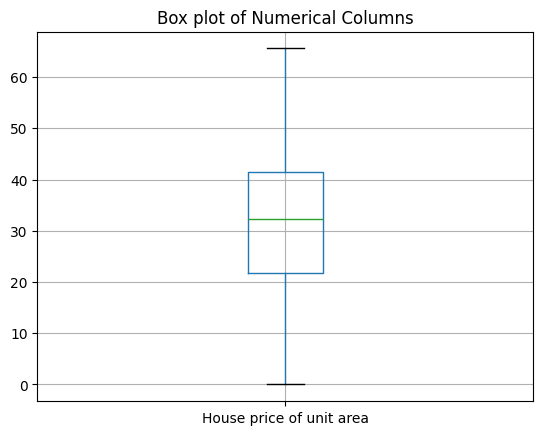

In [195]:
df.boxplot(column=['House price of unit area']) 
plt.title('Box plot of Numerical Columns')
plt.show()

In [196]:
df.describe()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,18.313947,775.713425,4.218421,24.973042,121.519749,31.408218
std,11.794616,714.493132,2.865900,0.024060,0.026574,14.199717
min,0.000000,23.382840,0.000000,24.932075,121.473888,0.000000
25%,8.800000,279.172600,1.750000,24.952169,121.497262,21.697606
50%,16.350000,482.758100,5.000000,24.973730,121.520423,32.354530
75%,30.150000,1159.454000,6.000000,24.994436,121.543680,41.412433
max,42.700000,3171.329000,10.000000,25.014578,121.565321,65.571716


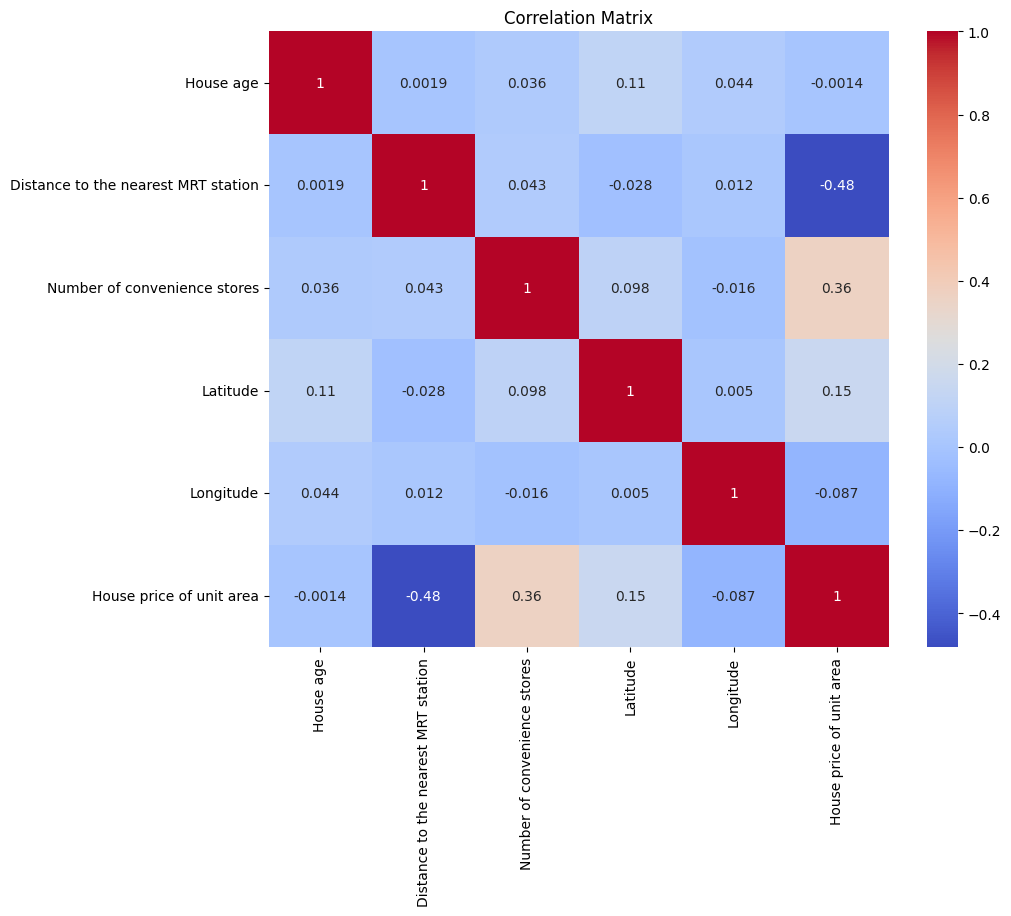

Relevant features based on correlation:
['Distance to the nearest MRT station', 'Number of convenience stores']


In [197]:
# Correlation Analysis
num_cols = [x for x in df.columns if x not in ['Transaction date']]
corr_matrix = df[num_cols].corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm") 
plt.title("Correlation Matrix")
plt.show()

# Identify relevant features based on correlation
threshold = 0.3
relevant_features = corr_matrix[(corr_matrix['House price of unit area'].abs() > threshold) & (corr_matrix.index != 'House price of unit area')].index.tolist() 
print("Relevant features based on correlation:") 
print(relevant_features)

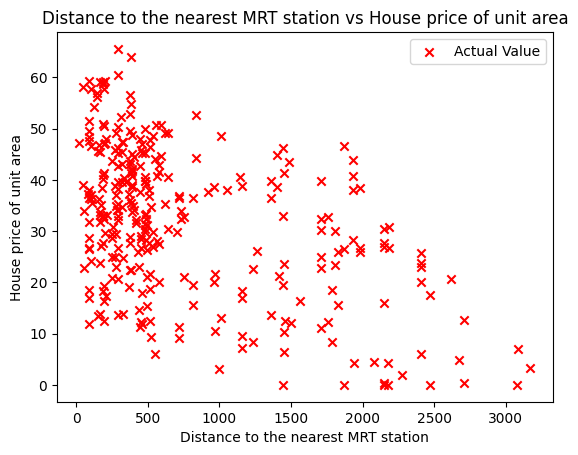

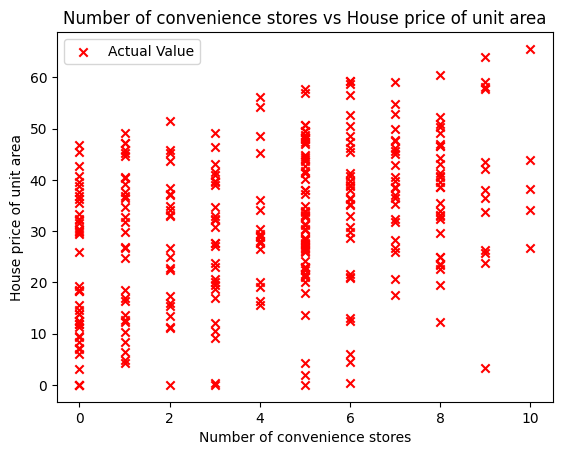

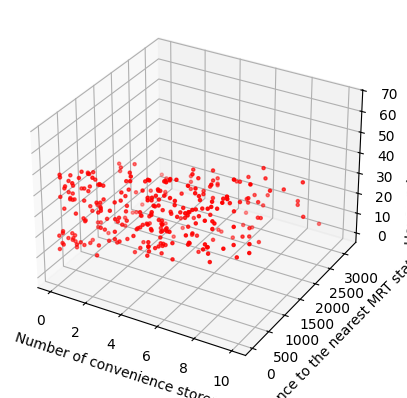

In [198]:
# select features based on correlation analysis
X = df[['Number of convenience stores', 'Distance to the nearest MRT station']].to_numpy()[:300]
Y = df['House price of unit area'].to_numpy()[:300]

X_test = df[['Number of convenience stores', 'Distance to the nearest MRT station']].to_numpy()[300:]
Y_test = df['House price of unit area'].to_numpy()[300:]

# Z score Normilize data
# scaler = StandardScaler()
# scaler.fit(X)
# X = scaler.transform(X)

# 2D scatter plot
plt.scatter(X[:,1], Y, marker='x', c='r', label="Actual Value"); 
plt.title("Distance to the nearest MRT station vs House price of unit area")
plt.xlabel("Distance to the nearest MRT station"); 
plt.ylabel("House price of unit area"); 
plt.legend(); 
plt.show()

# 2D scatter plot
plt.scatter(X[:,0], Y, marker='x', c='r', label="Actual Value"); 
plt.title("Number of convenience stores vs House price of unit area")
plt.xlabel("Number of convenience stores"); 
plt.ylabel("House price of unit area"); 
plt.legend(); 
plt.show()

# 3d scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y, marker='.', color='red')
ax.set_xlabel("Number of convenience stores")
ax.set_ylabel("Distance to the nearest MRT station")
ax.set_zlabel("House price of unit area")
plt.show()

MAE: 10.080867956674087
RMSE: 11.730767223793231
Final Equation: y = 30.77 + 2.10x1 + -0.01x2


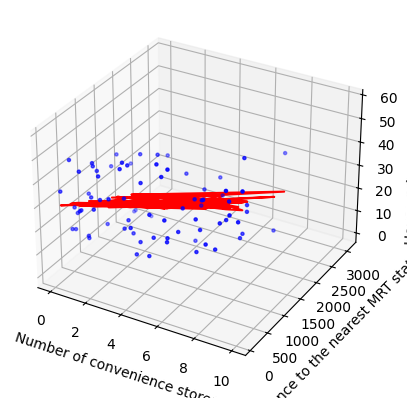

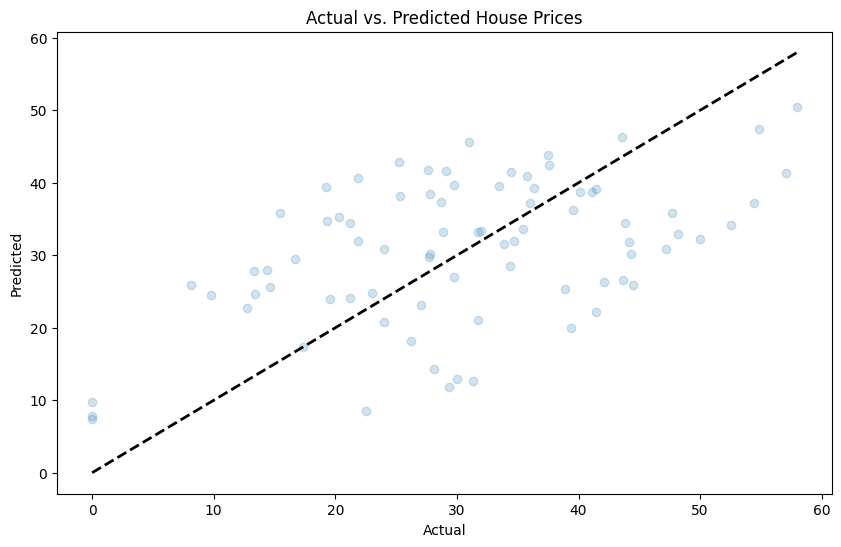

In [199]:
# Linear regression model
model = LinearRegression()
model.fit(X, Y)
y_pred = model.predict(X_test)
# Evaluate model
print("MAE: {}".format(np.abs(Y_test-y_pred).mean()))
print("RMSE: {}".format(np.sqrt(((Y_test-y_pred)**2).mean())))
# Model parameters
coefs = model.coef_
intercept = model.intercept_
# Predict Model
print("Final Equation: y = {:.2f} + {:.2f}x1 + {:.2f}x2".format(intercept, coefs[0], coefs[1]))

# plot model
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test[:,0], X_test[:,1], Y_test, marker='.', color='blue')
ax.set_xlabel("Number of convenience stores")
ax.set_ylabel("Distance to the nearest MRT station")
ax.set_zlabel("House price of unit area")
ax.plot3D(X_test[:,0], X_test[:,1], y_pred, 'red')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred, alpha=0.2)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Actual vs. Predicted House Prices')
plt.show()



Intercecpt: 30.411199316802236
[ 0.00000000e+00  1.92034714e+00 -8.61730687e-03  1.75853894e-02
  4.38287508e-05 -8.78847582e-07]
MAE: 10.105163278529256
RMSE: 11.753121960398705
Final Equation: y = 30.41 + 0.00 + 1.92x1 + -0.01x2 + 0.02x1^2 + 0.00x1x2 + -0.00x2^2


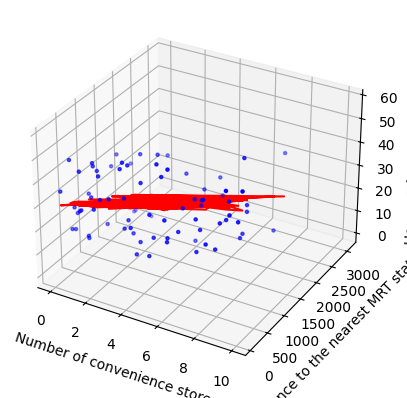

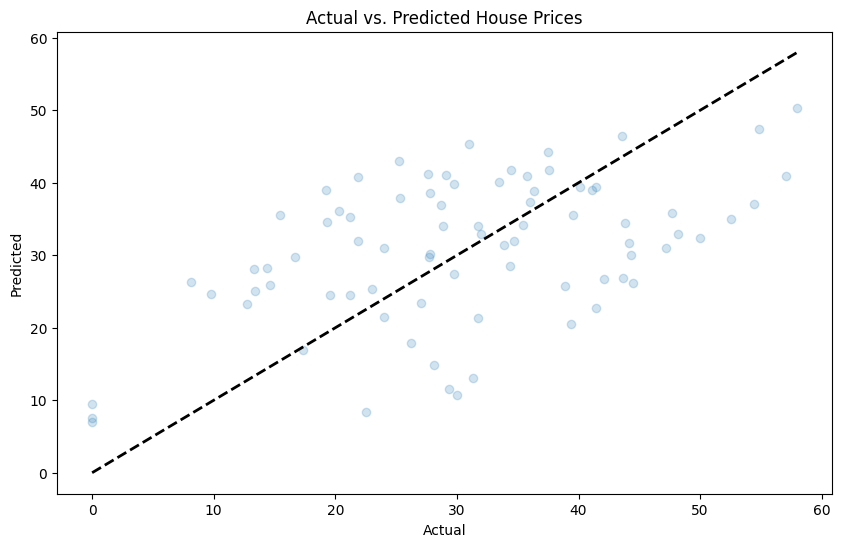

In [200]:
# Polynomial regression
poly = PolynomialFeatures(degree=2)

# Transform data for poly model
poly_features = poly.fit_transform(X)
poly_test_features = poly.fit_transform(X_test)
# create model
poly_reg_model=LinearRegression()
# # train model
poly_reg_model.fit(poly_features,Y)

#display model coefficients
print(f'Intercecpt: {poly_reg_model.intercept_}')
print(poly_reg_model.coef_)

y_pred_poly = poly_reg_model.predict(poly_test_features)

print("MAE: {}".format(np.abs(Y_test-y_pred_poly).mean()))
print("RMSE: {}".format(np.sqrt(((Y_test-y_pred_poly)**2).mean())))

print("Final Equation: y = {:.2f} + {:.2f} + {:.2f}x1 + {:.2f}x2 + {:.2f}x1^2 + {:.2f}x1x2 + {:.2f}x2^2"
      .format(poly_reg_model.intercept_, poly_reg_model.coef_[0], poly_reg_model.coef_[1], poly_reg_model.coef_[2], poly_reg_model.coef_[3], poly_reg_model.coef_[4], poly_reg_model.coef_[5]))

# plot model
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test[:,0], X_test[:,1], Y_test, marker='.', color='blue')
ax.set_xlabel("Number of convenience stores")
ax.set_ylabel("Distance to the nearest MRT station")
ax.set_zlabel("House price of unit area")
ax.plot3D(X_test[:,0], X_test[:,1], y_pred_poly, 'red')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred_poly, alpha=0.2)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Actual vs. Predicted House Prices')
plt.show()




Mean Squared Error (Polynomial Regression): 124.57938927543917
R-squared (Polynomial Regression): 0.5496730640945564
MAE: 9.518038948835441
RMSE: 11.161513753762936


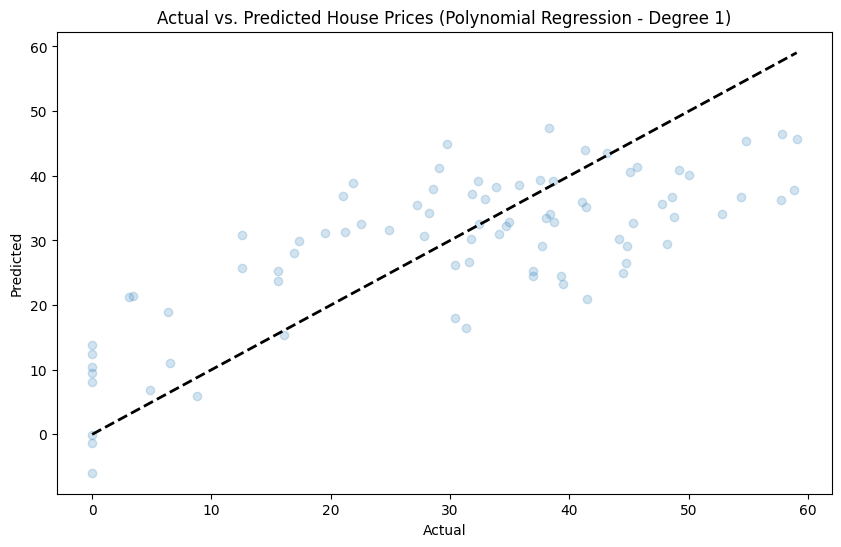

In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv("C:/Users/raees/Desktop/New folder/Projects/machine-learning/Projects/Regression/data/Real_Estate.csv")

features = ['Distance to the nearest MRT station', 'Number of convenience stores', 'Latitude', 'Longitude']
target = 'House price of unit area'

X = data[features].values
y = data[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degree = 1 
model = make_pipeline(PolynomialFeatures(degree), StandardScaler(), LinearRegression())

model.fit(X_train, y_train)

y_pred_poly = model.predict(X_test)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print("Mean Squared Error (Polynomial Regression):", mse_poly)
print("R-squared (Polynomial Regression):", r2_poly)

print("MAE: {}".format(np.abs(y_test-y_pred_poly).mean()))
print("RMSE: {}".format(np.sqrt(((y_test-y_pred_poly)**2).mean())))

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_poly, alpha=0.2)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Actual vs. Predicted House Prices (Polynomial Regression - Degree {degree})')
plt.show()